In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data_frame = pd.read_csv('wdbc.data', header=None)

column_names = [
    'IDNum', 'diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1', 'compactness1', 'concavity1', 'concave_points1', 'symmetry1', 'fractal_dimension1',
    'radius2', 'texture2', 'perimeter2', 'area2', 'smoothness2', 'compactness2', 'concavity2', 'concave_points2', 'symmetry2', 'fractal_dimension2',
    'radius3', 'texture3', 'perimeter3', 'area3', 'smoothness3', 'compactness3', 'concavity3', 'concave_points3', 'symmetry3', 'fractal_dimension3'
]
data_frame.columns = column_names
np.seterr(divide='ignore')

{'divide': 'warn', 'over': 'warn', 'under': 'ignore', 'invalid': 'warn'}

In [3]:
pd.set_option('display.max_columns', 32)
data_frame.head()

,IDNum,diagnosis,radius1,texture1,perimeter1,area1,smoothness1,compactness1,concavity1,concave_points1,symmetry1,fractal_dimension1,radius2,texture2,perimeter2,area2,smoothness2,compactness2,concavity2,concave_points2,symmetry2,fractal_dimension2,radius3,texture3,perimeter3,area3,smoothness3,compactness3,concavity3,concave_points3,symmetry3,fractal_dimension3
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871,1.0950,0.9053,8.589,153.40,0.006399,0.04904,0.05373,0.01587,0.03003,0.006193,25.38,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667,0.5435,0.7339,3.398,74.08,0.005225,0.01308,0.01860,0.01340,0.01389,0.003532,24.99,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999,0.7456,0.7869,4.585,94.03,0.006150,0.04006,0.03832,0.02058,0.02250,0.004571,23.57,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744,0.4956,1.1560,3.445,27.23,0.009110,0.07458,0.05661,0.01867,0.05963,0.009208,14.91,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883,0.7572,0.7813,5.438,94.44,0.011490,0.02461,0.05688,0.01885,0.01756,0.005115,22.54,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678


In [4]:
df = data_frame.loc[:, ('diagnosis', 'radius1', 'texture1', 'perimeter1', 'area1', 'smoothness1')]
df.rename(columns={'radius1':'radius', 'texture1':'texture', 'perimeter1':'perimeter', 'area1':'area', 'smoothness1':'smoothness'}, inplace=True)
df['diagnosis'] = df['diagnosis'].map({'M' : 1, 'B' : 0})

In [5]:
df['radius_normal'] = (df['radius'] - df['radius'].mean()) / df['radius'].std()
df['texture_normal'] = (df['texture'] - df['texture'].mean()) / df['texture'].std()
df.head()

,diagnosis,radius,texture,perimeter,area,smoothness,radius_normal,texture_normal
0,1,17.99,10.38,122.80,1001.0,0.11840,1.096100,-2.071512
1,1,20.57,17.77,132.90,1326.0,0.08474,1.828212,-0.353322
2,1,19.69,21.25,130.00,1203.0,0.10960,1.578499,0.455786
3,1,11.42,20.38,77.58,386.1,0.14250,-0.768233,0.253509
4,1,20.29,14.34,135.10,1297.0,0.10030,1.748758,-1.150804


<Axes: xlabel='radius_normal', ylabel='texture_normal'>

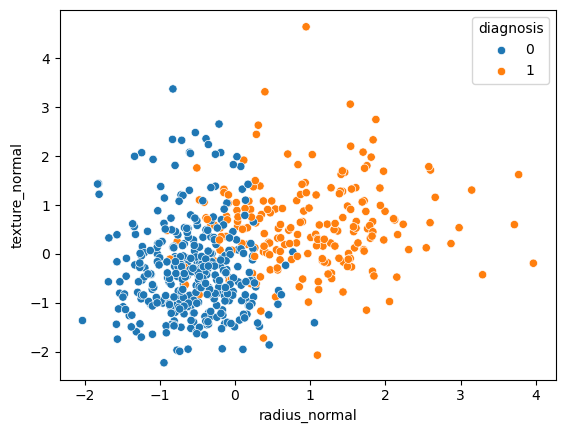

In [6]:
sns.scatterplot(x='radius_normal', y='texture_normal', hue='diagnosis', data=df)

In [7]:
from sklearn.model_selection import train_test_split

X = df[['radius_normal', 'texture_normal']]
y = df['diagnosis']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.9, random_state=42)
X_train, y_train = X_train.to_numpy().transpose(), y_train.to_numpy()

In [8]:
def predict(w, b, X):
    res = np.dot(w, X) + b
    return res

In [9]:
def sigmoid(z):
    e = np.exp(-z)
    res = 1 / (1 + e)
    return res

In [10]:
def gradient(w, b, yp, y, X, size):
    w_g, b_g = np.zeros(2), np.float64(0.0)
    w_fin, b_fin = np.zeros(2), np.float64(0.0)
    
    for i in range(w.size):
        w_g[i] = np.dot((yp - y), X[i]).sum()
    b_g = (yp - y).sum()

    for j in range(w.size):
        w_fin[j] = (1/size) * w_g[j]
    b_fin = (1/size) * b_g
    
    return w_fin, b_fin

In [11]:
def logistic_regression(X, y):
    w = np.array([1,1])
    b = np.float64(0)
    J_all = np.array([])
    
    for _  in range(max_iterations):
        z = predict(w, b, X)
        f_pred = sigmoid(z)
        loss = y * np.log(f_pred) + (1 - y) * np.log(1 - f_pred)
    
        J = (-1/m) * loss.sum()
        J_all = np.append(J_all, J)
        
        w_grad, b_grad = gradient(w, b, f_pred, y, X_train, m)
        w = w - a * w_grad
        b = b - a * b_grad

    return w, b, J_all

In [12]:
m = X_train[0].size
max_iterations = 100
a = 0.02

w, b, J = logistic_regression(X_train, y_train)
w, b

(array([1.22940358, 0.92654675]), np.float64(-0.21135275884417787))

In [13]:
z = np.dot(w, X_test.to_numpy().transpose()) + b
y_pred = sigmoid(z)

In [20]:
import math

df_test = pd.DataFrame(X_test)
df_test['diagnosis'] = y_test
df_test['prediction_diagnosis'] = y_pred

In [21]:
df_test

,radius_normal,texture_normal,diagnosis,prediction_diagnosis
204,-0.470281,-0.160345,0,0.281287
70,1.365676,0.469736,1,0.870213
131,0.378175,0.044257,1,0.573118
431,-0.490144,-0.374247,0,0.238541
540,-0.734182,-1.127554,0,0.103522
...,...,...,...,...
190,0.026307,0.890565,1,0.656140
476,0.020632,0.288384,0,0.520292
309,-0.305697,-1.267055,0,0.146645
259,0.398039,3.317887,1,0.966176
